<div style="text-align: center; margin: 40px 20px;">
    <div style="margin: 20px 0; border-top: 1px solid #B0E0E6; border-bottom:1px solid #B0E0E6; background-color:  #e6f7ff;">
 <font style="color: #4169E1; font-size:40px; font-weight: 700; text-align:center; text-transform: uppercase; letter-spacing: 1px; line-height:1.2;"> 📈 Exploratory Data Analysis</font>
    </div>
 <font style="font-size:26px; font-weight: 700; text-align:center;"> Shopping Habits of Instacart Cutomers</font>
</div>

# Contents <a id='contents'></a>

[1. 📓 Introduction](#introduction)  
[2. 🎯 Project goal](#project_goal)  
[3. 🐼 Loading libraries, Reading all the data files and creating Dataframes](#loading-libraries)  
[4. ❤️‍🩹 Find and remove duplicate values](#find_and_remove_duplicates)  
[5. ❤️‍🩹 Find and remove missing values](#find_and_remove_missing)  
[6. 📊 Analysis](#analysis)  
 * [Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible](#analysis-1)
 * [What time of day do people shop for groceries?](#analysis-2)
 * [What day of the week do people shop for groceries?](#analysis-3)
 * [How long do people wait until placing another order?](#analysis-4)
 * [Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?](#analysis-5)
 * [What's the distribution for the number of orders per customer?](#analysis-6)
 * [What are the top 20 popular products?](#analysis-7)
 * [How many items do people typically buy in one order?](#analysis-8)
 * [What are the top 20 items that are reordered most frequently?](#analysis-9)
 * [What are the top 20 items that people put in their carts first?](#analysis-10)  

[7. 💡 Findings](#findings)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 📓 Introduction <a id='introduction'></a>  
[Back to Contents](#contents)

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was [publicly released](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) by Instacart in 2017 for a [Kaggle competition](https://www.kaggle.com/c/instacart-market-basket-analysis/overview).

In this Exploratory Data Analysis (EDA) project we'll clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 🎯 Project goal <a id='project_goal'></a>  
[Back to Contents](#contents)

1. To clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. 
2. Provide a brief explanation of the results after answering each question.
3. Make plots that communicate your results.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 🐼 Loading libraries, Reading all the data files and creating Dataframes <a id='loading-libraries'></a>  
[Back to Contents](#contents)

In [1]:
# Importing required libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## 1. Reading data from `instacart_orders.csv`  
[Back to Contents](#contents)

Open the data file `instacart_orders.csv` from `datasets` folder and look at the general contents of the table. The seperator of this file is `;`.

Read the file and save it in `orders` variable:

In [2]:
# Reading instacart_orders.csv file with ';' as separator
orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')

Get the information of the data in the DataFrame - `orders`:

In [3]:
# Getting the general information about the data in the dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The Dataframe - `orders` has a total of **478966 rows and 6 columns**.  

The **columns description** are as follows:  
- `order_id`: ID number that uniquely identifies each order
- `user_id`: ID number that uniquely identifies each customer account
- `order_number`: the number of times this customer has placed an order
- `order_dow`: day of the week that the order placed (which day is 0 is uncertain)
- `order_hour_of_day`: hour of the day that the order was placed
- `days_since_prior_order`: number of days since this customer placed their previous order  

Also, it seems that `days_since_prior_order` column has some missing values.

Print the first 10 table rows:

In [4]:
# Printing the first 10 rows of the dataframe
orders.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


<hr style="margin-bottom: 40px;">

## 2. Reading data from `products.csv`  
[Back to Contents](#contents)

Open the data file `products.csv` from `datasets` folder and look at the general contents of the table. The seperator of this file is `;`.

Read the file and save it in `products` variable:

In [5]:
# Reading products.csv file with ';' as separator
products = pd.read_csv('datasets/products.csv', sep=';')

Get the information of the data in the DataFrame - `products`:

In [6]:
# Getting the general information about the data in the dataframe
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


The Dataframe - `products` has a total of **49694 rows and 4 columns**.  

The **columns description** are as follows:  
- `product_id`: ID number that uniquely identifies each product
- `product_name`: name of the product
- `aisle_id`: ID number that uniquely identifies each grocery aisle category
- `department_id`: ID number that uniquely identifies each grocery department category 

Also, it seems that `product_name` column has some misssing values.

Print the first 10 table rows:

In [7]:
# Printing the first 10 rows of the dataframe
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


 <hr style="margin-bottom: 40px;">
 
 ## 3. Reading data from `order_products.csv`  
 [Back to Contents](#contents)

Open the data file `order_products.csv` from `datasets` folder and look at the general contents of the table. The seperator of this file is `;`.

Read the file and save it in `order_products` variable:

In [8]:
# Reading order_products.csv file with ';' as separator
order_products = pd.read_csv('datasets/order_products.csv', sep=';')

Get the information of the data in the DataFrame - `order_products`:

In [9]:
# Getting the general information about the data in the dataframe
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


The Dataframe - `order_products` has a total of **4545007 rows and 4 columns**.  

The **columns description** are as follows:  
- `order_id`: ID number that uniquely identifies each order
- `product_id`: ID number that uniquely identifies each product
- `add_to_cart_order`: the sequential order in which each item was placed in the cart
- `reordered`: 0 if the customer has never ordered this product before, 1 if they have

Also, it seems that `add_to_cart_order` column has some missing values.

Print the first 10 table rows:

In [10]:
# Printing the first 10 rows of the dataframe
order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


 <hr style="margin-bottom: 40px;">
 
 ## 4. Reading data from `aisles.csv`  
 [Back to Contents](#contents)

Open the data file `aisles.csv` from `datasets` folder and look at the general contents of the table. The seperator of this file is `;`.

Read the file and save it in `aisles` variable:

In [11]:
# Reading order_products.csv file with ';' as separator
aisles = pd.read_csv('datasets/aisles.csv', sep=';')

Get the information of the data in the DataFrame - `aisles`:

In [12]:
# Getting the general information about the data in the dataframe
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


The Dataframe - `aisles` has a total of **134 rows and 2 columns**.  

The **columns description** are as follows:  
- `aisle_id`: ID number that uniquely identifies each grocery aisle category
- `aisle`: name of the aisle

There are no missing values in any of the columns of the table.

Print the first 10 table rows:

In [13]:
# Printing the first 10 rows of the dataframe
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


 <hr style="margin-bottom: 40px;">
 
 ## 5. Reading data from `departments.csv`  
 [Back to Contents](#contents)

Open the data file `departments.csv` from `datasets` folder and look at the general contents of the table. The seperator of this file is `;`.

Read the file and save it in `departments` variable:

In [14]:
# Reading departments.csv file with ';' as separator
departments = pd.read_csv('datasets/departments.csv', sep=';')

Get the information of the data in the DataFrame - `departments`:

In [15]:
# Getting the general information about the data in the dataframe
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


The Dataframe - `departments` has a total of **21 rows and 2 columns**.  

The **columns description** are as follows:  
- `department_id`: ID number that uniquely identifies each grocery department category
- `department`: name of the department

There are no missing values in any of the columns of the table.

Print the first 10 table rows:

In [16]:
# Printing the first 10 rows of the dataframe
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# ❤️‍🩹 Find and remove duplicate values <a id='find_and_remove_duplicates'></a>  
[Back to Contents](#contents)

<hr style="margin-bottom: 40px;">

## 1. `orders` data frame  
[Back to Contents](#contents)

We can use the `duplicated()` method together with `sum()` to **get the number of duplicate rows in the DataFrame - `orders`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [17]:
# Checking for duplicated orders
orders.duplicated().sum()

15

**There are 15 duplicate rows in the `orders` Dataframe i.e. 15 duplicate orders.**

Let's try to peek into the data to see if everything else is accurate. **List out all the orders placed on Wednesday at 2.00 AM**. In order to filter the data, we need to first look at the description of the columns of the Dataframe - `orders`. As per the description:
- `order_dow`: day of the week that the order placed (which day is 0 is uncertain)
- `order_hour_of_day`: hour of the day that the order was placed  

Although `order_dow` represents the day of the week that the order was placed but **whether to consider 0 as Sunday or not** is not clear. But, let's see  in which format does `order_hour_of_day` stores the hour - 12-hour or 24-hour? Let's print the list of unique values in `order_hour_of_day` column. We could use `unique()` method on the Series - `orders['order_hour_of_day']` for doing so as `unique()` method returns an array of unique values in order of their appearance in the Series.

In [18]:
# Printing the list of unique values in order_hour_of_day column
orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

After looking at the values above, we can now conclude that `order_hour_of_day` column contains **hour of the day in 24-hour format**.

So, let's **filter out all the orders placed on Wednesday at 2:00 AM, assuming that _0_ means _Saturday_**:

In [19]:
# Checking for all orders placed Wednesday at 2:00 AM, assuming that 0 means Saturday i.e. Wednesday will be day no. 4
orders[(orders['order_dow'] == 4) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
2124,401544,80955,72,4,2,2.0
14847,1913472,138992,16,4,2,6.0
16116,2796392,154904,12,4,2,13.0
16471,2209130,72786,5,4,2,30.0
32120,2235095,89980,18,4,2,7.0
...,...,...,...,...,...,...
467118,3210362,51765,22,4,2,5.0
470642,2205284,121327,33,4,2,2.0
472604,2101463,60877,6,4,2,30.0
477497,776659,111694,9,4,2,15.0


We already found out that there are 15 duplicate rows in the Dataframe - `orders`. Let's **get rid of them using `drop_duplicates()` and reset the Dataframe index using `reset_index(drop=True)`**.

In [20]:
# Removing duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

Perfect! Let's **double check for duplicate rows using `duplicated()` method together with `sum()`**. `duplicated()` method returns a boolean Series denoting duplicate rows. We should get a sum of zero.

In [21]:
# Double checking for duplicate rows
orders.duplicated().sum()

0

Awesome! **We have successfully eliminated all the duplicate records from our table**.

We have checked for duplicate rows in the `orders` Dataframe but **let's see if we have duplicate order IDs**. Since, this time we want to find out if we have any duplicate order IDs, we will first get a Series of data for `order_id` column and then, apply `dupliacted()` method along with `sum()` on it.

In [22]:
# Double checking for duplicate order IDs only
orders['order_id'].duplicated().sum()

0

**We don't have any duplicate order IDs in the `orders` Dataframe.**

<hr style="margin-bottom: 40px;">

## 2. `products` data frame  
[Back to Contents](#contents)

We can use the `duplicated()` method together with `sum()` to **get the number of duplicate rows in the DataFrame - `products`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [23]:
# Checking for fully duplicate rows
products.duplicated().sum()

0

**We don't have any duplicate rows in the `products` Dataframe**.  

Let's check for just duplicate product IDs using `duplicated()` method together with `sum()`. Since, this time we want to find out if we have any duplicate product IDs, we will first get a Series of data for `product_id` column and then, apply `dupliacted()` method along with `sum()` on it.

In [24]:
# Checking for just duplicate product IDs
products['product_id'].duplicated().sum()

0

**We don't have any duplicate product IDs in the `products` Dataframe**.  

**Let's check for just duplicate product names (after converting them to lowercase) using `duplicated()` method together with `sum()`**. Since, we are comparing Strings to check for duplicates and String could be stored in any cases, it is always safe to convert the string into lowercase (or uppercase - whichever you prefer) before proceeding to find out the duplicates.

In [25]:
# Checking for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

Wow! **There are 1362 duplicate product names**.  

But, are all the duplicate product names have a meaning value? **Let's check for duplicate product names that aren't missing**. We can use Boolean Dataframe Indexing to filter the desired data and also, could utilize Logical operators - `&`, `|` and `~`, if needed.

In [26]:
# Checking for duplicate product names that aren't missing
products[(products['product_name'].str.lower().duplicated() == True) & (products['product_name'].isna() == False)]['product_name'].count()

104

**There are 104 duplicate product names that aren't missing**. That means 1257 product names are missing.

<hr style="margin-bottom: 40px;">

## 3. `departments` data frame  
[Back to Contents](#contents)

We can **use the `duplicated()` method together with `sum()` to get the number of duplicate rows in the DataFrame - `departments`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [27]:
# Checking for fully duplicate rows
departments.duplicated().sum()

0

**There are no duplicated rows in the `departments` Dataframe**.  

That's great! But what about the duplicate department names. **Let's check if you have duplicated department names - `departments` Dataframe**. Since, we are comparing Strings to check for duplicates and String could be stored in any cases, it is always safe to convert the string into lowercase (or uppercase - whichever you prefer) before proceeding to find out the duplicates.

In [28]:
# Checking for just duplicate department names (convert names to lowercase to compare better)
departments['department'].str.lower().duplicated().sum()

0

So, we could conclude that **we don't have any duplicate department names in the `departments` Dataframe**. All the department names are unique in the Dataframe.

<hr style="margin-bottom: 40px;">

## 4. `aisles` data frame  
[Back to Contents](#contents)

**We can use the `duplicated()` method together with `sum()` to get the number of duplicate rows in the DataFrame - `aisles`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [29]:
# Checking for fully duplicate rows
aisles.duplicated().sum()

0

**There are no duplicated rows in the `aisles` Dataframe**.  

**Let's check if you have duplicated aisle names - `aisles` Dataframe**. Since, we are comparing Strings to check for duplicates and String could be stored in any cases, it is always safe to convert the string into lowercase (or uppercase - whichever you prefer) before proceeding to find out the duplicates.

In [30]:
# Checking for just duplicate aisle names (convert names to lowercase to compare better)
aisles['aisle'].str.lower().duplicated().sum()

0

Wow! **There are no duplicated aisle names in the aisles Dataframe**.

<hr style="margin-bottom: 40px;">

## 5. `order_products` data frame  
[Back to Contents](#contents)

**We can use the `duplicated()` method together with `sum()` to get the number of duplicate rows in the DataFrame - `order_products`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [31]:
# Checking for fully duplicate rows
order_products.duplicated().sum()

0

**There are no duplicated rows in the `order_products` Dataframe**.  

**Let's check if you have duplicated combination of `order_id` and `product_id` in - `order_products` Dataframe.** Since, we are looking for duplicates on the basis of the combination of two columns here, we could use `subset=` property of the `duplicated()` method to find duplicates on specific column(s).

In [32]:
# Double checking for any other tricky duplicates
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

We can conclude from above that **we don't have duplicated combination of `order_id` and `product_id` in - `order_products` Dataframe.**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# ❤️‍🩹 Find and remove missing values <a id='find_and_remove_missing'></a>  
[Back to Contents](#contents)

## 1. `products` data frame  
[Back to Contents](#contents)

**Let's get the general information of the data in the DataFrame - `products` using `info()` method** and look over the number of rows the Dataframe has, how many non-null values each column has and also, get an idea of the data types of the column.

In [33]:
# Getting the general information about products Dataframe
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


We have a total of 49694 rows in the Dataframe. The Dataframe has 4 columns with 3 columns having no missing values. **We have some missing values in `product_name` column**.  

**Let's see how many missing values do we have, by using `isna().sum()` on `product_name` column.**. 

The `isna()` method returns a Series (or Dataframe) containing Boolean values - True or False, indicating whether the values in the cell is missing or not. The missing values that are considered by the `isna()` method are - `NaN` in numeric arrays, `None` or `NaN` in object arrays, `NaT` in datetimelike. It doesn't take any other user-defined values into account.

The `sum()` method adds up all the Boolean values by `isna()` method and gives us the total count of missing values.

In [34]:
# Counting the number of missing values in the product_name column
products['product_name'].isna().sum()

1258

**There are in total 1258 missing values in the `product_name` column**.  

We could also double check applying `value_counts(dropna=False)` on `product_name` also:

In [35]:
# Counting the number of missing values in the product_name column
products['product_name'].value_counts(dropna=False)

NaN                                      1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
                                         ... 
Organic Fresh Carrot Chips                  1
Unbleached Jumbo Baking Cups                1
Super Glue Gel Control                      1
3 Cheese Ravioli                            1
BURRITO- STEAK & CHEESE                     1
Name: product_name, Length: 48437, dtype: int64

As we could see from the output above that **there are 1258 missing values in `product_name` column**.

Let's dig deep into the records where `product_name` is missing. **We'll try to see what are the aisle IDs for the missing products**, to better understand what values should we fill up the missing product names with. We could use Boolean Dataframe indexing to filter out the data. We could also use `unique()` method on the Series for doing so as it returns an array of unique values in order of their appearance in the Series.

In [36]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isna()]['aisle_id'].unique()

array([100])

Interesting! So, **all the rows with missing product names are associated with aisle ID 100**.  

Let's also **check what the department IDs for the missing product names?** We could use Boolean Dataframe indexing to filter out the data. We could also use `unique()` method on the Series for doing so as it returns an array of unique values in order of their appearance in the Series.

In [37]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isna()]['department_id'].unique()

array([21])

So, now we can conclude that **all of the missing product names are associated with aisle ID 100 and department ID 21**. That's great.  

But, the IDs alone don't give us any idea. Won't that be great to know that **what is this ailse and department?** Let's find out. We can use `query()` method on our Dataframe to query the rows based on the expression given as string.

Let's find out first - **What is this aisle with ID 100?**

In [38]:
# What is this aisle with ID 100?
aisle_100 = aisles.query('aisle_id == 100')
aisle_100

,aisle_id,aisle
99,100,missing


So, **the aisle name for the Aisle ID 100 is 'missing'**.  

Next - **What is this department with ID 21?**

In [39]:
# What is this department with ID 21?
dept_21 = departments.query('department_id == 21')
dept_21

,department_id,department
20,21,missing


So, the department name for the Department ID 21 is 'missing'.

**Since, the Aisle and Department names are also missing, it is safe to conclude that we can fill the missing product names with 'Unknown' as value.** We could use `fillna()` method to fill NA/NaN values in the Series with some meaningful value.

In [40]:
# Filling missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

Alright! So, **let's double check that we successfully replaced the missing values in the `products` Dataframe**.

In [41]:
# Counting the number of missing values in the product_name column
products['product_name'].isna().sum()

0

We can safely conclude that **we don't have any more missing values in the `products` Dataframe**.

In [42]:
# Counting the number of missing values in the product_name column
products['product_name'].value_counts(dropna=False)

Unknown                                  1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
                                         ... 
Organic Fresh Carrot Chips                  1
Unbleached Jumbo Baking Cups                1
Super Glue Gel Control                      1
3 Cheese Ravioli                            1
BURRITO- STEAK & CHEESE                     1
Name: product_name, Length: 48437, dtype: int64

Awesome! **The 1258 missing values in the `product_name` column has been replaced by `Unknown`**.

<hr style="margin-bottom: 40px;">

## 2. `orders` data frame  
[Back to Contents](#contents)

**Let's get the information of the data in the DataFrame - `orders` using `info()` method** and look over the number of rows the Dataframe has, how many non-null values each column has and also, get an idea of the data types of the column.

In [43]:
# Getting the general information about orders Dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


We have a total of 478952 rows in the Dataframe. The Dataframe has 6 columns with 5 columns having no missing values. **We have some missing values in `days_since_prior_order` column**. Let's check how many?

- Rather than summing the values returned by `isna()`, we can count missing values directly using the `value_counts()` method. 
- When called on a single column (i.e. a Series), it returns **the number of times each unique value occurs in that column**.
- This method has a parameter called `dropna=`, which is set to `True` by default. This means `value_counts()` will exclude `None` or `NaN` values unless you set `dropna=False`.

In [44]:
# Checking how many missing values does the days_since_prior_order column has
orders['days_since_prior_order'].value_counts(dropna=False)

30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
NaN     28817
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: days_since_prior_order, dtype: int64

**There are 28817 missing values in the `days_since_prior_order` column.**  

Let's print the records from `orders` table where `days_since_prior_order` is missing.

In [45]:
# Printing records where days_since_prior_order is missing
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


We notice that **`order_number` column that tells the number of times this customer has placed an order - is 1 for all the missing `days_since_prior_order`**.  (`order_number` columns indcates the number of times the customer has placed an order).

**Let's check if there are any missing values where it's not a customer's first order?** We can use `query()` method on our Dataframe to query the rows based on the expression given as string.

In [46]:
# Are there any missing values where it's not a customer's first order?
orders.query('order_number != 1 & days_since_prior_order.isna()')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


So, **we can conclude that the missing values for `days_since_prior_order` column is only for the customer's first order and that makes sense, since the customer would not have ordered anything before.**

<hr style="margin-bottom: 40px;">

## 3. `order_products` data frame  
[Back to Contents](#contents)

Let's get the information of the data in the DataFrame - `order_products` using `info()` method and look over the number of rows the Dataframe has, how many non-null values each column has and also, get an idea of the data types of the column.  

The `order_products` Dataframe contains many rows of data. When a DataFrame has too many rows, `info()` will not print the non-null counts by default. If you want to to print the non-null counts, include `show_counts=True` when you call `info()`.

In [47]:
# Getting the general information about orders Dataframe
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


We have a total of 4545007 rows in the Dataframe. The Dataframe has 4 columns with 3 columns having no missing values. **We have some missing values in `add_to_cart_order` column.** Let's check how many?

In [48]:
# Checking how many missing values does the add_to_cart_order column has
order_products['add_to_cart_order'].isna().sum()

836

**We have 836 missing values in the `add_to_cart_order` column**.  

Let's check the minimum and maximum values in the column - `add_to_cart_order`. The `min()` method returns a Series with the minimum value of each column. And the `max()` method returns a Series with the maximum value of each column.

In [49]:
# What are the min and max values in this column?

# Finding the minimum value
min_value = order_products['add_to_cart_order'].min()
min_value

1.0

In [50]:
# Finding the maximum value
max_value = order_products['add_to_cart_order'].max()
max_value

64.0

**The minimum and maximum values in the column - `add_to_cart_order` are 1.0 and 64.0 respectively.**. 

Now, **let's find and save all a list of order IDs with at least one missing value in `add_to_cart_order` column**. We could follow the below steps:  
1. Create a new column - `add_to_cart_order_is_missing` in the Dataframe, to store the Boolean value whether `add_to_cart_order` is missing or not. We can use `isna()` method to check if the value in a cell is missing or not.
2. Group the Dataframe by `order_id` and save the grouped data in `order_products_grpd` variable.
3. Get all order IDs with at least one missing value in `add_to_cart_order` column and save the array in `order_ids_with_missing_values` variable. We could use Boolean Dataframe indexing to filter out data from the grouped dataframe and get the indices of the Dataframe using the `index` property.

In [51]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

# Creating a new column - 'add_to_cart_order_is_missing' to store value if 'add_to_cart_order' is missing or not
order_products['add_to_cart_order_is_missing'] = order_products['add_to_cart_order'].isna()

# Grouping the df by 'order_id' and saving the grouped data in 'order_products_grpd'
order_products_grpd = order_products.groupby('order_id').sum()

# Getting all order IDs with at least one missing value in 'add_to_cart_order' and saving it in 'order_ids_with_missing_values'
order_ids_with_missing_values = order_products_grpd[order_products_grpd['add_to_cart_order_is_missing'] >= 1].index

# Displaying all order IDs with at least one missing value in 'add_to_cart_order'
order_ids_with_missing_values

Int64Index([   9310,   61355,  102236,  129627,  165801,  171934,  180546,
             264710,  293169,  388234,  404157,  678116,  733526,  747668,
             813364,  844733,  854647,  871281,  888470,  903110,  936852,
            1021563, 1038146, 1169835, 1183255, 1220886, 1302315, 1308785,
            1386261, 1477139, 1529171, 1564093, 1598369, 1625713, 1633337,
            1648217, 1673227, 1677118, 1713430, 1717990, 1730767, 1800005,
            1832957, 1888628, 1916118, 1959075, 1961723, 1968313, 2094761,
            2136777, 2170451, 2256933, 2409109, 2449164, 2470674, 2479011,
            2621907, 2625444, 2652650, 2721963, 2729254, 2849370, 2926893,
            2979697, 2997021, 2999801, 3125735, 3308010, 3347453, 3383594],
           dtype='int64', name='order_id')

We have saved all order IDs with at least one missing value in `add_to_cart_order` in `order_ids_with_missing_values` variable.  

Now, our intent is to check - **Do all orders with missing values have more than 64 products?**. We could follow the below steps:
1. Get (or filter) from `order_products` the orders with the IDs saved in `order_ids_with_missing_values` variable (we can use `isin()` function to get orders with those IDs).
2. Group the filtered data by `order_id` so we can `count()` them.
3. Sort the resultant Series using `sort_values()` method in ascending order so we can figure out what is the least number of products do the orders with missing values have.

In [52]:
# Do all orders with missing values have more than 64 products?

# Dropping the additional column - 'add_to_cart_order_is_missing' added for analysis
order_products = order_products.drop(columns='add_to_cart_order_is_missing')

# Filtering all the orders with order IDs in 'order_ids_with_missing_values' and saving in 'filtered_orders_with_missing_values'
filtered_orders_with_missing_values = order_products[order_products['order_id'].isin(order_ids_with_missing_values)]

# Counting the number of products for each order ID and sorting them in ascending order
filtered_orders_with_missing_values.groupby(by='order_id')['product_id'].count().sort_values(ascending=True)

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

From the above result, we can conclude that indeed **all orders with missing values have more than 64 products**.  

**Let's replace missing values in `add_to_cart_order` column with 999 using `fillna()` method**. And then, we could print a sample of 10 rows using `sample()` method. We can use `random_state` as seed for reproducibility.

In [53]:
# Replace missing values with 999 and convert column to integer type

# Replacing the missing values in the 'add_to_cart_order' with 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

# Printing a sample of rows from the list of order IDs with missing values to show replaced missing values
order_products[order_products['order_id'].isin(order_ids_with_missing_values)].sample(n=10, random_state=20)

,order_id,product_id,add_to_cart_order,reordered
624513,102236,3988,46.0,0
1128175,165801,38596,64.0,0
2933415,1633337,8518,42.0,0
876543,1800005,41665,3.0,1
1961551,61355,9421,999.0,0
2006891,1302315,14852,49.0,0
4376957,1968313,5605,999.0,0
229974,2170451,47180,56.0,1
3035128,888470,21795,53.0,0
1677445,1308785,34519,28.0,0


So, **all the missing values in `add_to_cart_order` column has been successfully replaced with 999**. We could always double check that there are now no missing values in the column by using a combination of `isna()` and `sum()` methods on the Series.

In [54]:
# Double checking that there is no missing value now in 'add_to_cart_order' column
order_products['add_to_cart_order'].isna().sum()

0

**There are now no missing values in column - `add_to_cart_order`**.  

**Let's check what are the datatypes of teh different columns of the Dataframe - `order_products`** using `dtypes` property. `dtypes` returns a Series with the data type of each column.

In [55]:
# Checking the datatypes of the columns in 'order_products'
order_products.dtypes

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

**We can conclude that `add_to_cart_order` column has a float datatype.**. 

But, we want to convert it to an integer. But, we have to make sure if it’s safe to perform the conversion from float to int or we will lose some information after we do this. For that, we can use `array_equal()` function from numpy. The method returns `True` if two arrays have the same shape and elements, `False` otherwise.

In [56]:
# Validating if it is safe to change datatype of 'add_to_cart_order' from float to integer
np.array_equal(order_products['add_to_cart_order'], order_products['add_to_cart_order'].astype('int'))

True

**We got a `True` - that means it is safe for us to convert the datatype of the column - `add_to_cart_order` from float to integer, without any data loss**.  

Now, let's convert the datatype using `astype()` method provided by pandas to cast a pandas object to a specified datatype.

In [57]:
# Converting the datatype of 'add_to_cart_order' from float to integer
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

# Validating the new datatypes of the columns in 'order_products'
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

Perfect! **We have successfully converted the datatype of `add_to_cart_order` column from float to integer** after ensuring that there will be no loss of data in the process.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 📊 Analysis <a id='analysis'></a>  
[Back to Contents](#contents)

## 1. Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6) <a id='analysis-1'></a>  
[Back to Contents](#contents)

**Let's verify that the `order_hour_of_day` values in the `orders` table is sensible i.e. `order_hour_of_day` ranges from 0 to 23.** Let's print the list of unique values in `order_hour_of_day` column.  

We could use `unique()` method on the Series - `orders['order_hour_of_day']` for doing so as `unique()` method returns an array of unique values in order of their appearance in the Series.  

We could also sort the Series in ascending order using `sort_values()` before using `unique()` method so that it will be easy to look and verify the data.

In [58]:
# Printing the list of unique values in order_hour_of_day column
orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

After looking at the values above, **we can now conclude that `order_hour_of_day` column contains hour of the day in 24-hour format and values range from 0 to 23**. 

Now, **let's verify that the `order_dow` values in the `orders` tables are also sensible i.e. `order_dow` ranges from 0 to 6**. We could use `unique()` method on the Series - `orders['order_dow']` for doing so as `unique()` method returns an array of unique values in order of their appearance in the Series.  

We could also sort the Series in ascending order using `sort_values()` before using `unique()` method so that it will be easy to look and verify the data.

In [59]:
# Printing the list of unique values in order_dow column
orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

We can safely conclude that **the `order_dow` values in the `orders` tables are also sensible i.e. `order_dow` ranges from 0 to 6**.

<hr style="margin-bottom: 40px;">

## 2. What time of day do people shop for groceries?  <a id='analysis-2'></a>  
[Back to Contents](#contents)

**Let's create a plot that shows how many people place orders for each hour of the day**.

Let's first have a look at the data to refresh our memory how the data looks in `orders` Dataframe using `head()`.

In [60]:
# Printing the first 5 rows
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


Also, let's see what the column descriptions say:
- `order_id`: ID number that uniquely identifies each order
- `user_id`: ID number that uniquely identifies each customer account
- `order_number`: the number of times this customer has placed an order
- `order_dow`: day of the week that the order placed (which day is 0 is uncertain)
- `order_hour_of_day`: hour of the day that the order was placed
- `days_since_prior_order`: number of days since this customer placed their previous order  

**We'll first prepare a dataframe to count the number of orders made per hour of the day.** We can use `groupby()` method to group the data from `orders` Dataframe by `order_hour_of_day` and then, count all the order IDs in each group.

In [61]:
# Counting the number of orders made per hour of the day
orders_per_hour_of_the_day = orders.groupby('order_hour_of_day')['order_id'].count()
orders_per_hour_of_the_day

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64

Now, since we have proper Dataframe - `orders_per_hour_of_the_day`, we'll plot a bar chart to show how many people place orders for each hour of the day.

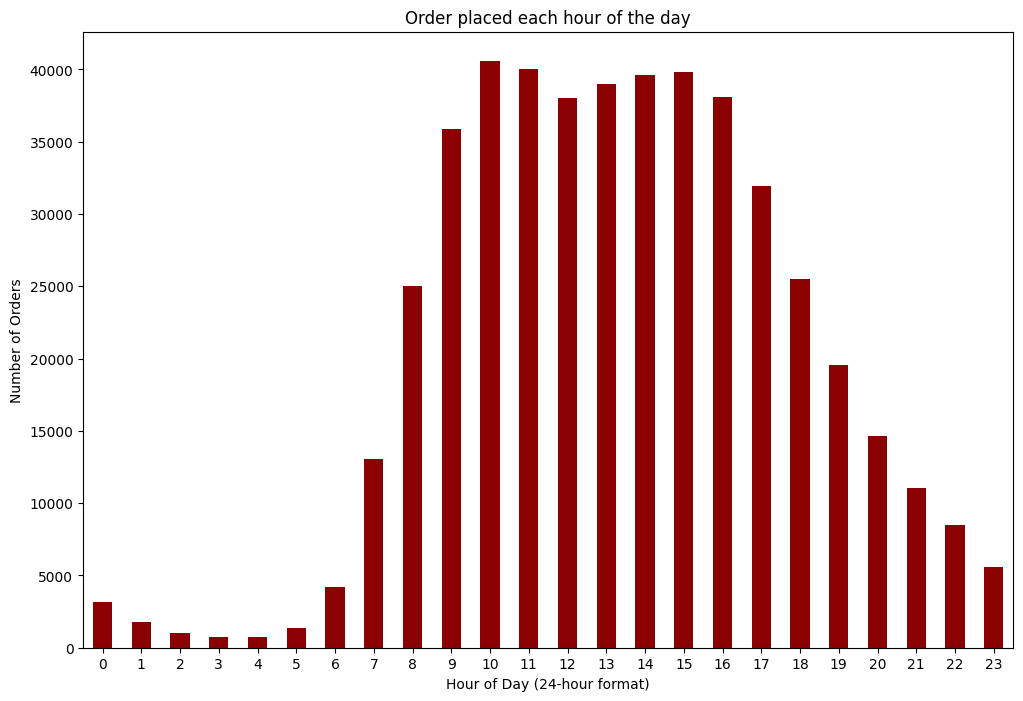

In [62]:
# Plotting a bar chart to show how many people place orders for each hour of the day
orders_per_hour_of_the_day.plot(
                            kind='bar',
                            title='Order placed each hour of the day',
                            xlabel='Hour of Day (24-hour format)',
                            ylabel='Number of Orders',
                            figsize=[12, 8],
                            color='DarkRed',
                            rot=0)

plt.show()

**We can conclude from the above graph that**:
1. The peak time when most of the people shop for groceries is around 10AM.
2. The time range when usually people shop for groceries is from 10AM to 4PM.

After analyzing the visualization above, it becomes apparent that **there is a significant decrease in orders from midnight until 5 in the morning**, which is understandable as people are generally sleeping at this time. However, **as the day progresses, there is an increase in orders from early morning shoppers which peaks in the late morning and remains steady throughout the afternoon. Towards the evening, there is a gradual decrease in orders**.

<hr style="margin-bottom: 40px;">

## 3. What day of the week do people shop for groceries?  <a id='analysis-3'></a>  
[Back to Contents](#contents)

Let's **create a plot that shows what day of the week people shop for groceries**.

**We'll first prepare a dataframe to count the number of orders made each day of the week.** We can use `groupby()` method to group the data from `orders` Dataframe by `order_dow` and then, count all the order IDs in each group.

In [63]:
# Counting the number of orders made each day of the week
orders_per_day_of_the_week = orders.groupby('order_dow')['order_id'].count()
orders_per_day_of_the_week

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64

Now, since we have proper Dataframe - `orders_per_day_of_the_week`, we'll plot a bar chart to show what day of the week people shop for groceries.

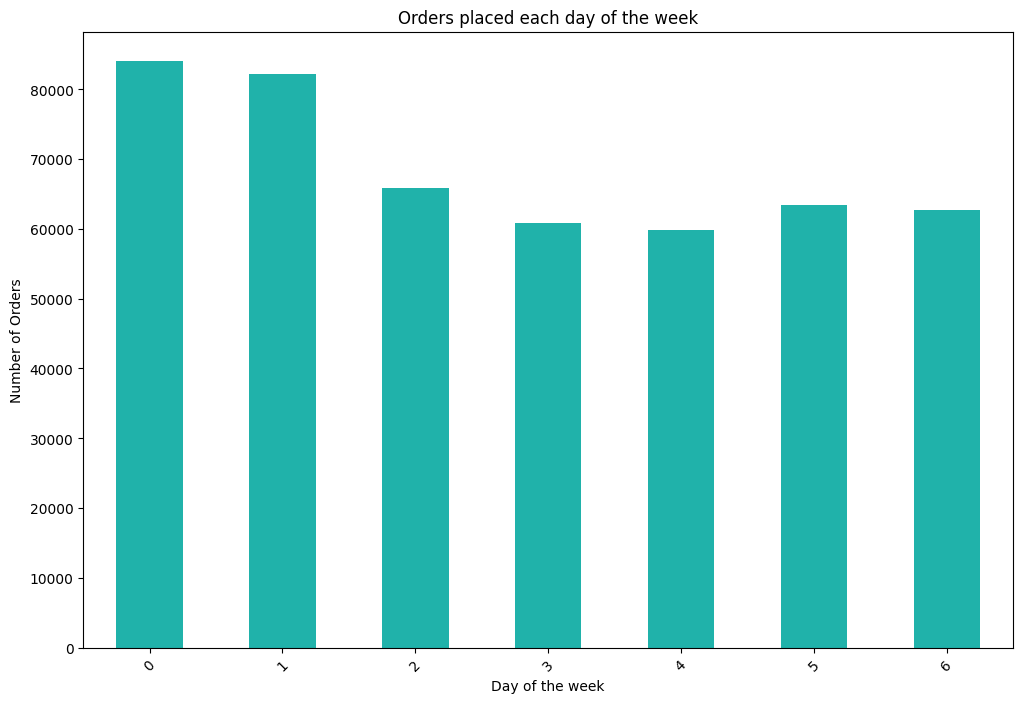

In [64]:
# Plotting a bar chart to show what day of the week people shop for groceries
orders_per_day_of_the_week.plot(
                            kind='bar',
                            title='Orders placed each day of the week',
                            xlabel='Day of the week',
                            ylabel='Number of Orders',
                            figsize=[12, 8],
                            color='LightSeaGreen',
                            rot=45)

plt.show()

Based on the information provided in the plot, **it can be concluded that the integers 0 and 1 correspond to Saturday and Sunday, respectively, while integers 2-6 represent the weekdays**. This inference can be made because the plot shows a higher number of orders placed on weekends compared to weekdays. Therefore, the starting day of the week in this scenario would be Saturday (0) and end on Friday (6).

In summary, **shopping activity tends to be higher on weekends than weekdays, with Saturdays being more popular than Sundays**. Among the weekdays, Wednesday has the lowest shopping activity while Monday has the highest.

<hr style="margin-bottom: 40px;">

## 4. How long do people wait until placing another order?  <a id='analysis-4'></a>  
[Back to Contents](#contents)

Let's **create a plot that shows how long people wait until placing their next order**, and find out the minimum and maximum values.

We'll first prepare a dataframe to show how long people wait until placing their next order. We can use `groupby()` method to group the data from `orders` Dataframe by `days_since_prior_order` and then, count all the order IDs in each group.

In [65]:
# How long people wait until placing their next order
orders_after_wait = orders.groupby('days_since_prior_order')['order_id'].count()
orders_after_wait

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: order_id, dtype: int64

Now, since we have proper Dataframe - `orders_after_wait`, we'll plot a bar chart to show how long people wait until placing their next order.

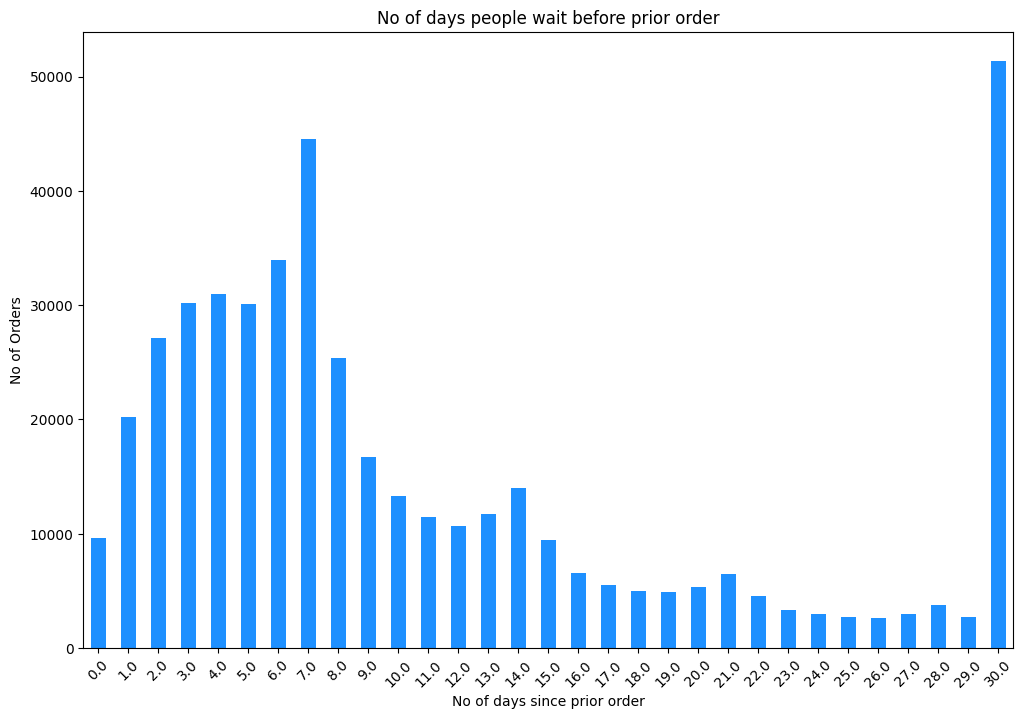

In [66]:
# Plotting a bar chart to show how long people wait until placing their next order
orders_after_wait.plot(
                        kind='bar',
                        title='No of days people wait before prior order',
                        xlabel='No of days since prior order',
                        ylabel='No of Orders',
                        figsize=[12, 8],
                        color='DodgerBlue',
                        rot=45)

plt.show()

**From the above graph, we can conclude that** -
1. People usually wait for 30 days since the prior order, at maximum to order groceries another time.
2. Very less people order the next groceries between 22 to 29 days.
3. The start of the month is usually a busy time when most of people order groceries.
4. The number of orders decreases gradually through the later part of the month.

Typically, people wait up to 30 days to order groceries again after their prior order, with very few placing their next order between 22 to 29 days. The beginning of the month tends to be a popular time for grocery orders, while the number of orders gradually decreases throughout the later part of the month.

<hr style="margin-bottom: 40px;">

## 5. Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?  <a id='analysis-5'></a>  
[Back to Contents](#contents)

In [67]:
# Filtering by orders placed on Saturdays i.e. order_dow = 0
sat_orders = orders.query("order_dow == 0")['order_hour_of_day']
sat_orders

3         20
5         11
7         18
23         0
25        11
          ..
478924    16
478926    10
478932     8
478933     9
478944    13
Name: order_hour_of_day, Length: 84090, dtype: int64

In [68]:
# Filtering by orders placed on Wednesdays i.e. order_dow = 4
wed_orders = orders.query("order_dow == 4")['order_hour_of_day']
wed_orders

4         12
9          8
10        11
17        22
21         9
          ..
478906    22
478911    19
478916    22
478929    23
478943     9
Name: order_hour_of_day, Length: 59810, dtype: int64

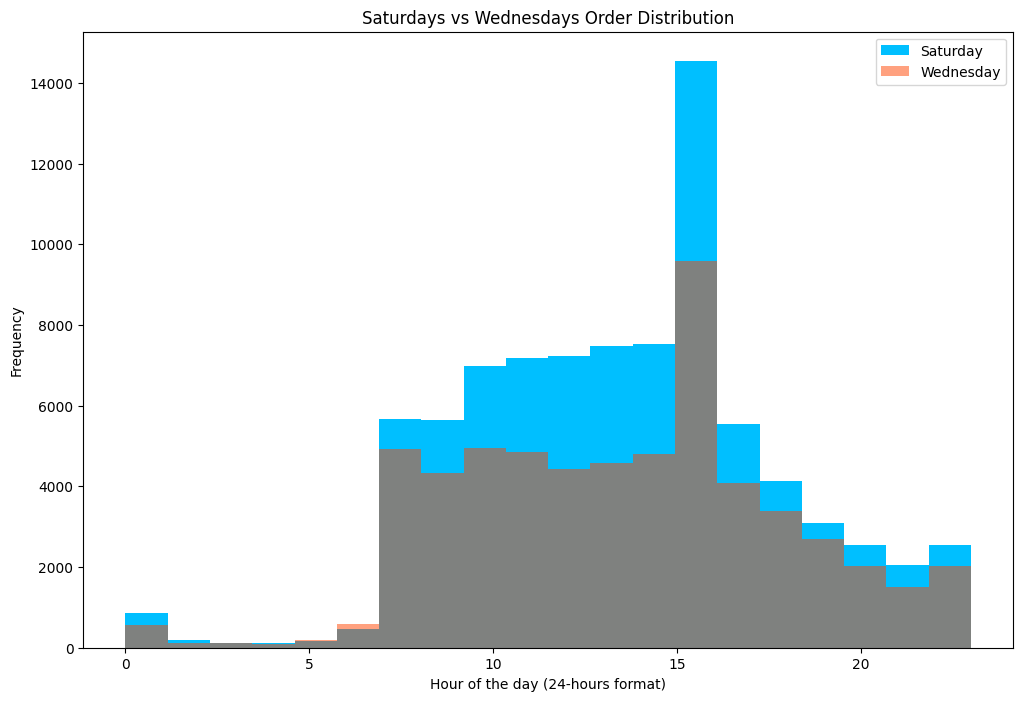

In [69]:
# Plotting histogram for the orders placed on Saturdays
sat_orders.plot(
    kind='hist',
    bins=20,
    title='Saturdays vs Wednesdays Order Distribution',
    figsize=[12, 8],
    color='DeepSkyBlue')

# Plotting histogram for the orders placed on Wednesdays
wed_orders.plot(kind='hist', bins=20, alpha=0.5, color='OrangeRed')

plt.legend(['Saturday', 'Wednesday'])
plt.xlabel('Hour of the day (24-hours format)')
plt.show()

**We can conclude from the graph above that**:
1. There is no apparent distribution differences between orders placed on Wednesdays or Saturdays.
2. The peak ordering times are look generally similar i.e. 15:00 - 16:00 or 3:00PM - 4:00PM.
3. The early hours of the day are usually the quietest and as the day goes by, the number of orders placed increses gradually.
4. The main difference is the volume of orders, as there are many more orders placed on Saturdays than on Wednesdays.

The visualization shows that there are no observable variations in the distribution of orders placed on Wednesdays versus Saturdays, and the busiest ordering hours tend to be between 3:00PM to 4:00PM. Additionally, the early hours of the day tend to be the least active for orders, with order volume gradually increasing as the day progresses. However, the key distinction between Wednesdays and Saturdays is the number of orders placed, with significantly more orders being placed on Saturdays than on Wednesdays.

<hr style="margin-bottom: 40px;">

## 6. What's the distribution for the number of orders per customer?  <a id='analysis-6'></a>  
[Back to Contents](#contents)

Let's **plot the distribution for the number of orders that customers place** (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)

For plotting the graph, we would need to count how many times each user ID appears in the table, which should be equal to the number of orders they placed. Let's compute the Dataframe.

In [70]:
# Counting how many times each user ID appears in the table
orders_per_cust = orders.groupby('user_id')['order_id'].count()
orders_per_cust

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64

Let's plot the distribution for the number of orders that customers place.

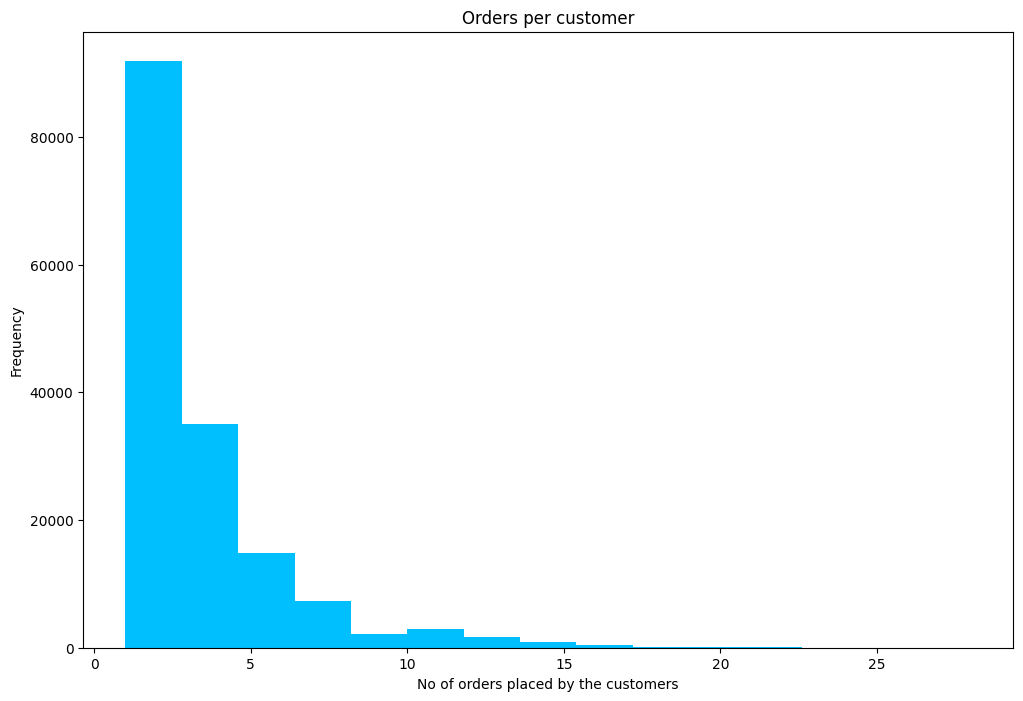

In [71]:
# Plotting histogram for the number of orders per customer
orders_per_cust.plot(
    kind='hist',
    bins=15,
    title='Orders per customer',
    figsize=[12, 8],
    color='DeepSkyBlue')

plt.xlabel('No of orders placed by the customers')

plt.show()

**We can conclude from the graph above that:**
1. Most of the customers (above 80000) place orders once or twice a month.
2. There are many customers who place orders from 3 to 8 times a month too.
3. The number of times customers tend to place orders in a month decreases significantly from 9 times onwards.

<hr style="margin-bottom: 40px;">

## 7. What are the top 20 popular products?  <a id='analysis-7'></a>  
[Back to Contents](#contents)

Let's try to find out the top 20 popular products.  

In order to find that we need to merge two dataframes - `order_products` and `products` on `product_id`s to get all the required columns.

In [72]:
# Merging order_products and products file on product_id to collect the product_name
merged_orders = order_products.merge(products, how='left', on='product_id')
merged_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16


In [73]:
# Getting the count of all the purchased products sorted in descending order along with their purchase counts
purchased_prodcuts_sorted = merged_orders.groupby(['product_id', 'product_name']).count().sort_values(by='order_id', ascending=False)['order_id']
purchased_prodcuts_sorted

product_id  product_name                                          
24852       Banana                                                    66050
13176       Bag of Organic Bananas                                    53297
21137       Organic Strawberries                                      37039
21903       Organic Baby Spinach                                      33971
47209       Organic Hass Avocado                                      29773
                                                                      ...  
5836        Arctic D Cod Liver Oil Lemon                                  1
43573       Whisk- 10 Inch                                                1
43570       Queso Cotija                                                  1
36174       Whole Pinto Beans                                             1
41403       Extra Rich & Thick Spaghetti Sauce Spices & Seasonings        1
Name: order_id, Length: 45573, dtype: int64

We're very close to our analysis. Let's get the top 20 products by using `head(20)` on the Series.

In [74]:
# Getting the top 20 purchased products
top_20_products = purchased_prodcuts_sorted.head(20)
top_20_products

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64

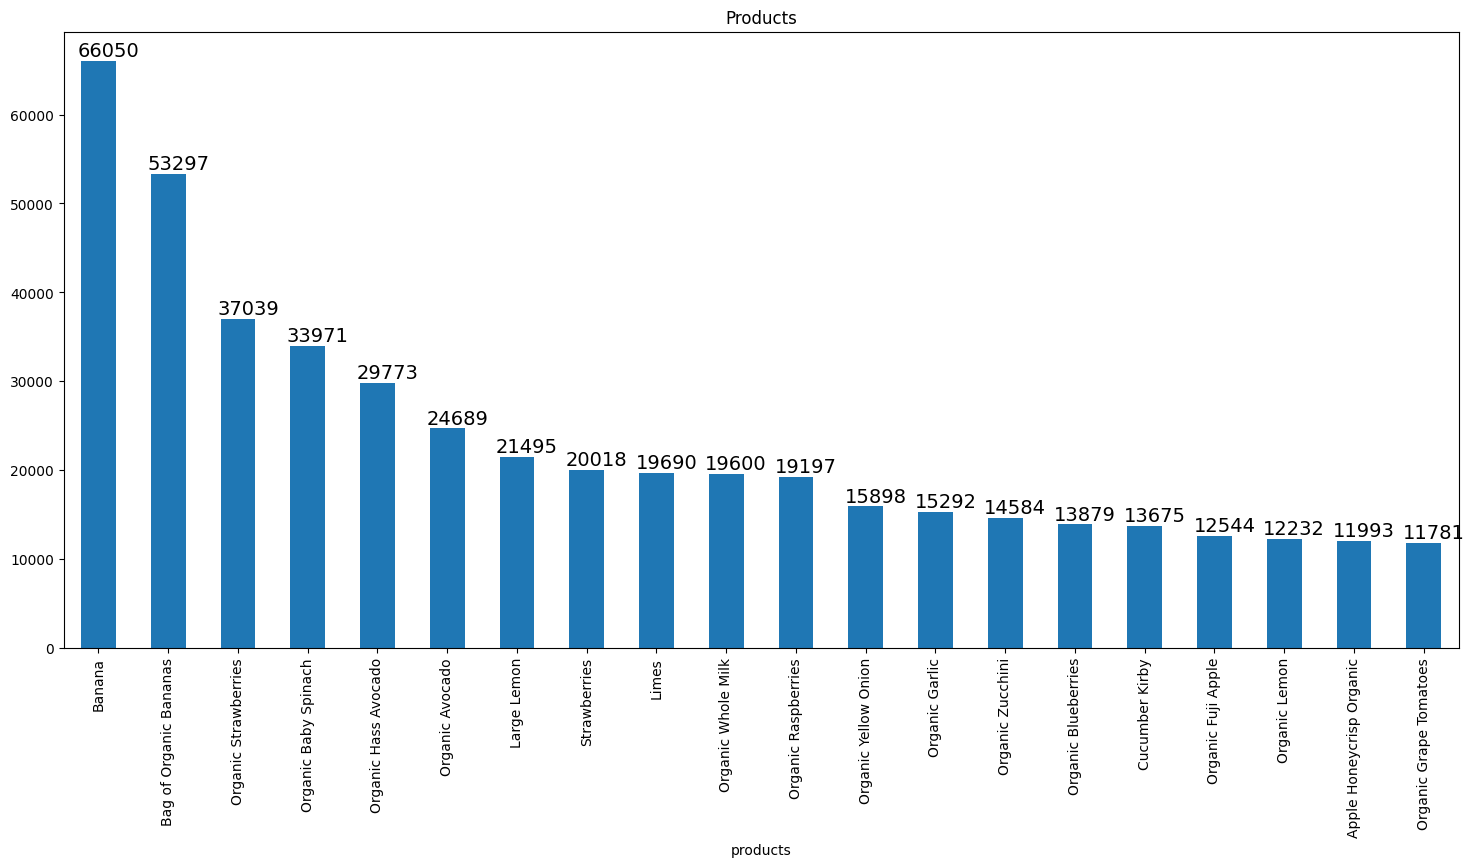

In [75]:
ax = top_20_products.reset_index().set_index('product_name')['order_id'].plot.bar(figsize=(18,8))

allpatches=[]
for i in ax.patches:
    allpatches.append(i.get_height())


for i in ax.patches:
    
    ax.text(i.get_x()-0.05, i.get_height()+500, i.get_height(), fontsize=14, color='black')

plt.title('Products')
plt.xlabel('products')
plt.ylabel('');

**Based on the list of the top 20 purchased products in the study and the graph above, some conclusions that can be drawn are**:

1. Fresh fruits and vegetables dominate the list.
2. Organic products are popular: 13 out of the top 20 products are organic.
3. Dairy is not as popular: Only one dairy product, organic whole milk, is on the list.
4. The top products are likely staple items: Many of the top products, such as bananas, strawberries, spinach, and avocados, are likely used frequently and considered staples by many consumers.

<hr style="margin-bottom: 40px;">

## 8. How many items do people typically buy in one order?  <a id='analysis-8'></a>  
[Back to Contents](#contents)

Let's try to find out **How many items do people typically buy in one order**?

First, let's prepare a dataset - counting the number of items per unique `order_id`. This will give us an idea that how many items have been ordered per order by the customers.

In [76]:
# Counting the number of items per unique order_id
items_per_order = order_products.groupby('order_id').count()[['product_id', 'add_to_cart_order']]
items_per_order

,product_id,add_to_cart_order
order_id,,
4,13,13
9,15,15
11,5,5
19,3,3
20,8,8
...,...,...
3421034,17,17
3421053,9,9
3421071,5,5


Now, let's get the data that can represent the frequency distribution of the number of items purchased per order by customers and then, sort the frequencies in the descending order by using `sort_values(ascending=False)` to get the top frequencies.

In [77]:
# Getting how many times a certain no. of items has been repeated in different orders
items_per_order = items_per_order.rename(columns={'product_id': 'no_of_items_per_order'})
freq_of_items_per_order = items_per_order.groupby('no_of_items_per_order').count()['add_to_cart_order'].sort_values(ascending=False)
freq_of_items_per_order

no_of_items_per_order
5      31923
6      31698
4      31054
7      30822
3      29046
       ...  
80         1
87         1
85         1
72         1
127        1
Name: add_to_cart_order, Length: 90, dtype: int64

Perfect! **The most frequent number of items purchased per order is 5, with 31,923 occurrences. This indicates that this is a popular quantity of items for customers to purchase.**

In [78]:
# Getting the first 20 most common number of items purchased per order
freq_of_items_per_order.head(20)

no_of_items_per_order
5     31923
6     31698
4     31054
7     30822
3     29046
8     28539
2     26292
9     25742
10    23248
1     21847
11    20406
12    18539
13    16497
14    14472
15    12696
16    11465
17    10002
18     8726
19     7612
20     6771
Name: add_to_cart_order, dtype: int64

In [79]:
# Getting the last 20 most common number of items purchased per order
freq_of_items_per_order.tail(20)

no_of_items_per_order
71     3
74     3
86     3
68     2
78     2
92     2
91     2
77     2
76     2
75     2
95     2
98     1
108    1
104    1
115    1
80     1
87     1
85     1
72     1
127    1
Name: add_to_cart_order, dtype: int64

Let's plot a histogram to visualize the frequency distribution.

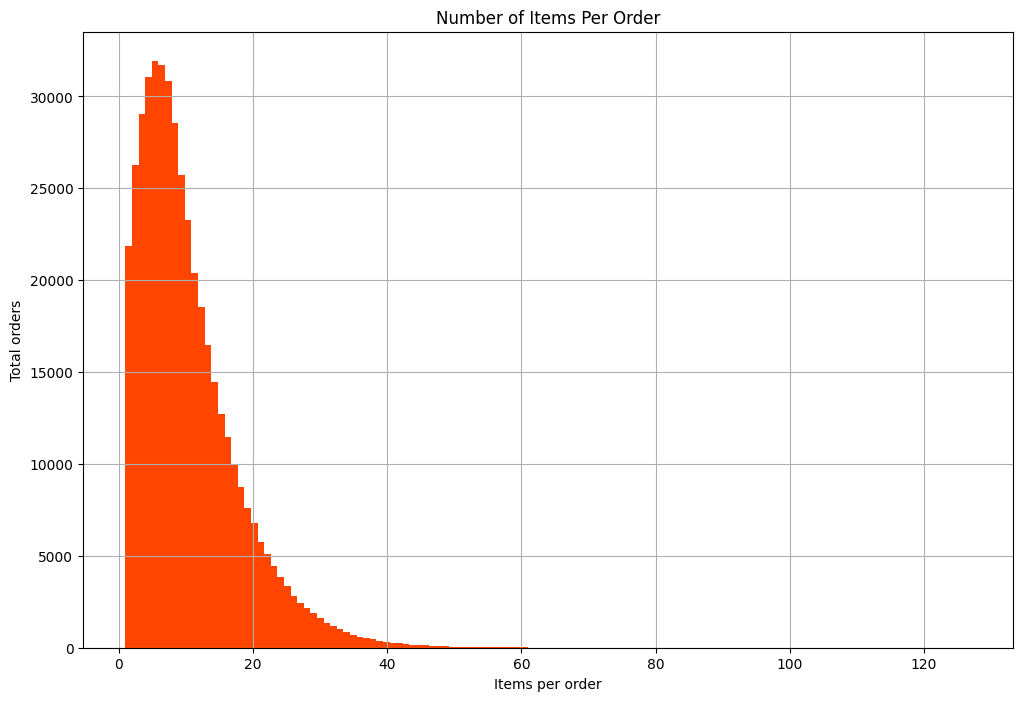

In [80]:
# Plotting distribution of items per order
items_per_order['add_to_cart_order'].hist(bins=128, figsize=[12, 8], color='OrangeRed')
plt.xlabel('Items per order')
plt.ylabel('Total orders')
plt.title('Number of Items Per Order')

plt.show()

In [81]:
# Calculating minimum and maximum items per order
items_per_order_min = items_per_order.min()
items_per_order_max = items_per_order.max()

print(f'The minimum no. of items per order is {items_per_order_min} and the maximum no. of items per order is {items_per_order_max}')

The minimum no. of items per order is no_of_items_per_order    1
add_to_cart_order        1
dtype: int64 and the maximum no. of items per order is no_of_items_per_order    127
add_to_cart_order        127
dtype: int64


**Based on the studies and the graph above, some of the conclusions that can be drawn are as follows:**
1. The most common number of items purchased per order is 5 with 31,923 occurrences, followed closely by 6 and 4. This indicates that 5 is a popular quantity of items for customers to purchase.
2. The frequency of the number of items purchased per order tends to decrease as the number of items per order increases or decreases from the most common values of 5, 6, and 4.
3. The minimum number of items per order is 1 and the maximum number of items per order is 127.

<hr style="margin-bottom: 40px;">

## 9. What are the top 20 items that are reordered most frequently?  <a id='analysis-9'></a>  
[Back to Contents](#contents)

Let's find out the top 20 items that are reordered most frequently and display their names and product IDs.

In order to proceed with our analysis, we need a Dataframe with `order_id`, `product_id`, `reordered` and `product_name`. Since we don't have any such Dataset yet, we will derive one.  

We will merge two datasets - `order_prodcuts` and `products` to create our new datasets with the required columns.

In [82]:
# Merging order_products and products file on product_id to collect the product_name
merged_orders = order_products[['order_id', 'product_id', 'reordered']].merge(products[['product_id', 'product_name']], how='left', on='product_id')
merged_orders.head()

,order_id,product_id,reordered,product_name
0,2141543,11440,0,Chicken Breast Tenders Breaded
1,567889,1560,1,Bag Of Ice
2,2261212,26683,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...
3,491251,8670,1,Diced Tomatoes
4,2571142,1940,1,Organic 2% Reduced Fat Milk


Now, let's get all the products that have been reordered i.e. where `reordered` = `1`

In [83]:
# Filtering all the products that have been reordered i.e. reordered = 1
reordered_products_list = merged_orders.query('reordered == 1')
reordered_products_list

,order_id,product_id,reordered,product_name
1,567889,1560,1,Bag Of Ice
2,2261212,26683,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...
3,491251,8670,1,Diced Tomatoes
4,2571142,1940,1,Organic 2% Reduced Fat Milk
5,2456893,21616,1,Organic Baby Arugula
...,...,...,...,...
4544999,1622300,24852,1,Banana
4545000,1125324,40600,1,Cheese Stuffed Crust Pepperoni Pizza
4545002,577211,15290,1,Orange Bell Pepper
4545004,692640,47766,1,Organic Avocado


Let's get the top 20 items that are reordered most frequently and display their names and product IDs.

In [84]:
# Grouping by product_id and product_name, sort by number of orders
reordered_products_list_grpd = reordered_products_list.groupby(['product_id', 'product_name'])
top_20_reordered_products = reordered_products_list_grpd.agg(number_of_orders = ('order_id', 'count')).sort_values(by='number_of_orders', ascending=False).head(20)
top_20_reordered_products

,,number_of_orders
product_id,product_name,
24852,Banana,55763
13176,Bag of Organic Bananas,44450
21137,Organic Strawberries,28639
21903,Organic Baby Spinach,26233
47209,Organic Hass Avocado,23629
47766,Organic Avocado,18743
27845,Organic Whole Milk,16251
47626,Large Lemon,15044
27966,Organic Raspberries,14748


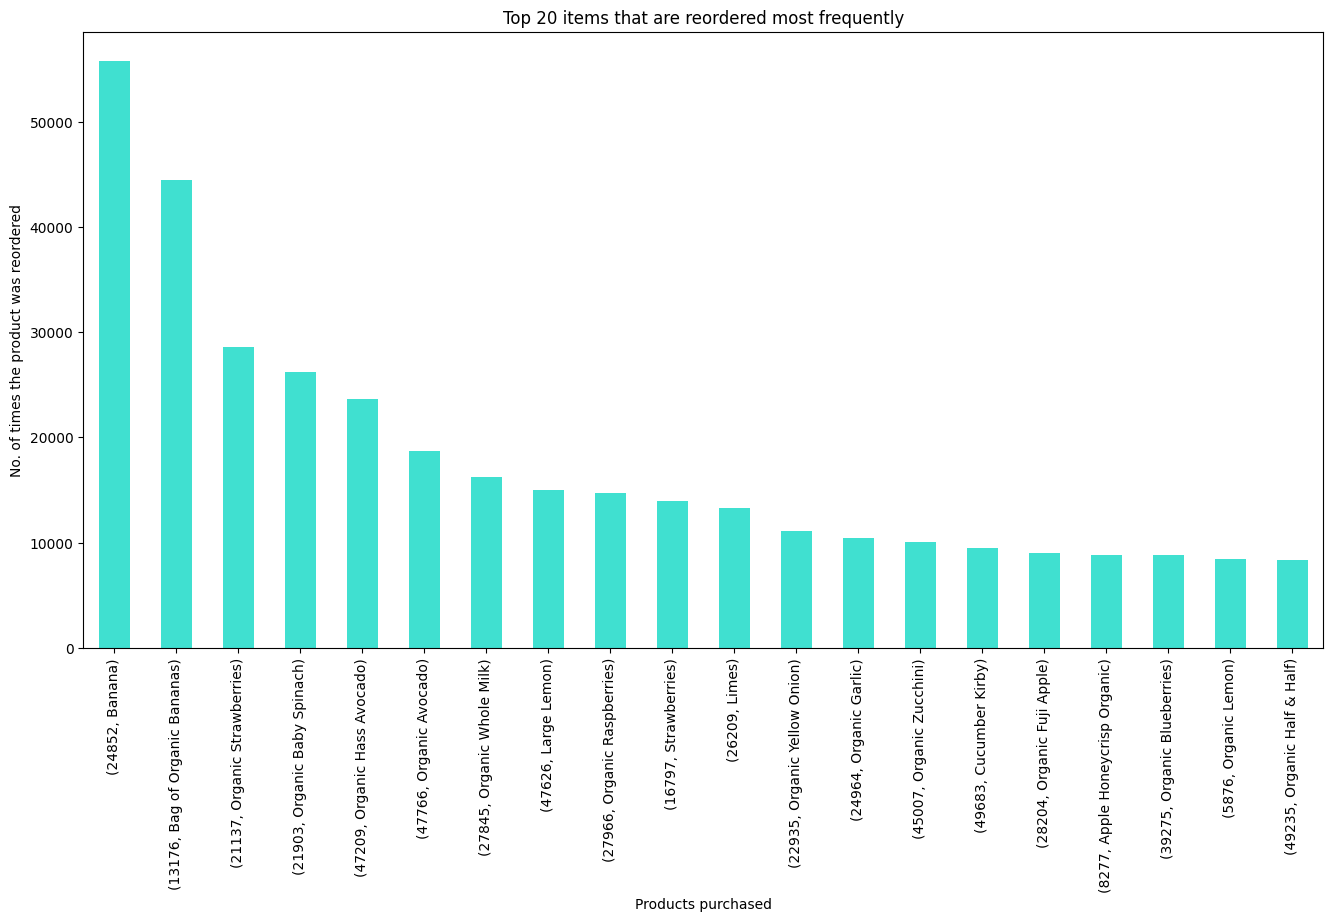

In [85]:
# Plotting graph showing the top 20 items that are reordered most frequently
top_20_reordered_products.plot(
        kind='bar',
        title='Top 20 items that are reordered most frequently',
        xlabel='Products purchased',
        ylabel='No. of times the product was reordered',
        figsize=[16, 8],
        legend=False,
        color='Turquoise')

plt.show()

**From the analysed data of top 20 products that have been reordered by customers on Instacart, we can conclude the following**:

1. Bananas and Bag of Organic Bananas are the top two products that have been reordered the most by customers on Instacart.
2. Organic fruits and vegetables are popular choices among customers for reordering on Instacart, including Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado, Organic Avocado, Organic Raspberries, and Organic Blueberries.
3. Customers also tend to reorder non-organic produce, such as Large Lemon, Strawberries, and Limes.
4. Organic dairy products, like Organic Whole Milk and Organic Half & Half, are also among the top 20 products that have been reordered by customers.
5. Organic Yellow Onion, Organic Garlic, and Organic Zucchini are the only three vegetables that made it to the list of top 20 products that have been reordered by customers.
6. Organic Fuji Apple and Apple Honeycrisp Organic are the only two apple varieties that made it to the list of top 20 products that have been reordered by customers.  

Overall, we can see that customers on Instacart prefer to reorder fresh produce, with a preference for organic fruits and vegetables. They also reorder popular dairy products and some non-organic fruits.

<hr style="margin-bottom: 40px;">

## 10. What are the top 20 items that people put in their carts first?  <a id='analysis-10'></a>  
[Back to Contents](#contents)

The objective is to determine the proportion of orders for an item compared to the number of times it was added first to a customer's cart. This calculation requires us to determine the total number of times the item has been ordered and the total number of times the item was the first to be placed in the cart. Once these figures have been obtained, we can sort the items based on this ratio.

In [86]:
# Merging order_products and products file on product_id to collect the product_name
merged_orders = order_products[['order_id', 'product_id', 'add_to_cart_order']].merge(products[['product_id', 'product_name']], how='left', on='product_id')
merged_orders.head()

,order_id,product_id,add_to_cart_order,product_name
0,2141543,11440,17,Chicken Breast Tenders Breaded
1,567889,1560,1,Bag Of Ice
2,2261212,26683,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...
3,491251,8670,35,Diced Tomatoes
4,2571142,1940,5,Organic 2% Reduced Fat Milk


Perfect! Now, let's filter all the products which people put first in their carts i.e. where `add_to_cart_order == 1`.

In [87]:
# Filtering where add_to_cart_order = 1
add_to_cart_list = merged_orders.query("add_to_cart_order == 1")
add_to_cart_list

,order_id,product_id,add_to_cart_order,product_name
1,567889,1560,1,Bag Of Ice
2,2261212,26683,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...
14,1961225,37553,1,Iced Coffee Lightly Sweet
16,639939,10017,1,Tilapia Filet
23,750040,8518,1,Organic Red Onion
...,...,...,...,...
4544978,1759009,46175,1,Half Baked® Ice Cream
4544989,115427,20842,1,Total 0% Greek Yogurt
4544990,2049780,28576,1,Vanilla Bean Chia Pod
4544997,2300092,10017,1,Tilapia Filet


In [88]:
# Getting the top 20 items that people put in their carts first
add_to_cart_list_grpd = add_to_cart_list.groupby(['product_id', 'product_name'])
freq_items_add_to_cart_list = add_to_cart_list_grpd.agg(number_of_orders = ('order_id', 'count')).sort_values('number_of_orders', ascending = False).head(20)
freq_items_add_to_cart_list

,,number_of_orders
product_id,product_name,
24852,Banana,15562
13176,Bag of Organic Bananas,11026
27845,Organic Whole Milk,4363
21137,Organic Strawberries,3946
47209,Organic Hass Avocado,3390
21903,Organic Baby Spinach,3336
47766,Organic Avocado,3044
19660,Spring Water,2336
16797,Strawberries,2308


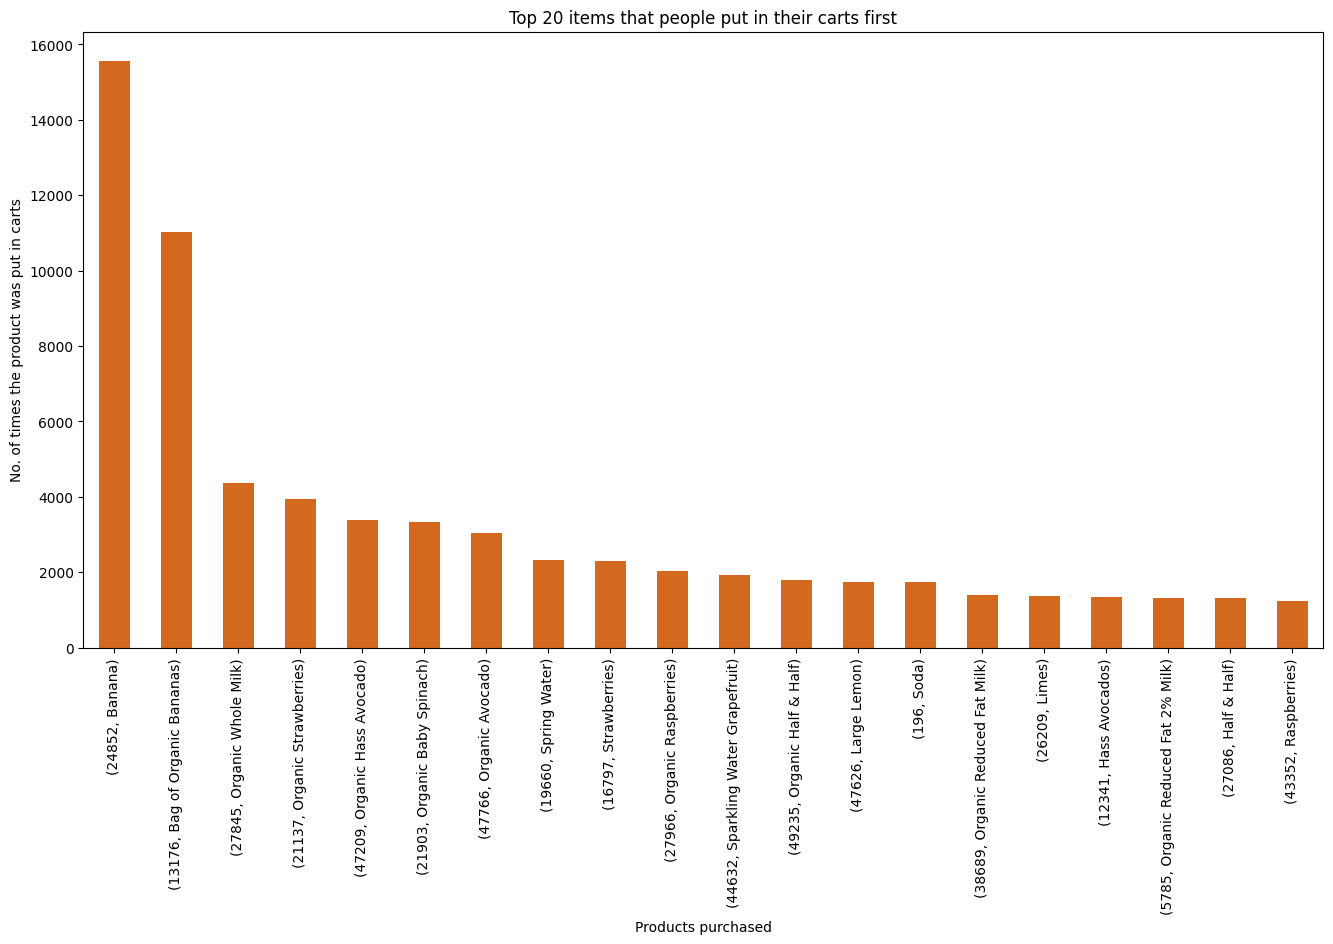

In [89]:
# Plotting graph showing the top 20 items that people put in their carts first
freq_items_add_to_cart_list.plot(
        kind='bar',
        title='Top 20 items that people put in their carts first',
        xlabel='Products purchased',
        ylabel='No. of times the product was put in carts',
        figsize=[16, 8],
        legend=False,
        color='Chocolate')

plt.show()

**Based on the analyzed data and graph, we can draw the following conclusions**:

1. The top two items that customers put in their carts first on Instacart are bananas and organic bananas, respectively. These items are very popular among Instacart customers.

2. Organic products are very popular among Instacart customers, as several organic items appear in the list, including organic whole milk, organic strawberries, organic Hass avocado, organic baby spinach, organic avocado, organic raspberries, and organic half & half.

3. Fresh produce is also popular among Instacart customers, as several fruits and vegetables appear in the list, including strawberries, lemons, limes, and baby spinach.

4. Beverages are also popular among Instacart customers, as both spring water and soda, appear in the list.

5. Reduced-fat milk and half & half are also popular among Instacart customers, with both organic and non-organic versions of these products appearing in the list.

Overall, the data suggests that Instacart customers prioritize fresh produce, organic products, and beverages when filling their carts. The popularity of bananas and organic bananas suggest that these items are likely staples in many households.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 💡 Findings  <a id='findings'></a>  
[Back to Contents](#contents)

I analyzed data released by Instacart in 2017 and our goal was to have some insight into the shopping habits of Instacart customers. I loaded five data files into dataframes and explored the data, checked and removed duplicates from dataframes and found and fixed missing values and data types, as required.  

Later, I did analysis on dataframes and made several data visualizations.  

Here are my findings:  
1. **Verify that values in the `order_hour_of_day` and `order_dow` columns in the orders table are sensible**  
The `order_hour_of_day` column in the `orders` table contains hour of the day in 24-hour format and values range from 0 to 23. The `order_dow` values in the `orders` table are also sensible i.e. `order_dow` ranges from 0 to 6.


2. **How many people place orders for each hour of the day?** 
There is a significant decrease in orders from midnight until 5 in the morning, which is understandable as people are generally sleeping at this time. However, as the day progresses, there is an increase in orders from early morning shoppers which peaks in the late morning and remains steady throughout the afternoon. Towards the evening, there is a gradual decrease in orders.  


3. **What day of the week people shop for groceries?**  
The shopping activity tends to be higher on weekends than weekdays, with Saturdays being more popular than Sundays. Among the weekdays, Wednesday has the lowest shopping activity while Monday has the highest.  


4. **How long people wait until placing their next order?**  
Typically, people wait up to 30 days to order groceries again after their prior order, with very few placing their next order between 22 to 29 days. The beginning of the month tends to be a popular time for grocery orders, while the number of orders gradually decreases throughout the later part of the month.  


5. **Is there a difference in `order_hour_of_day` distributions on Wednesdays and Saturdays?**  
There are no observable variations in the distribution of orders placed on Wednesdays versus Saturdays, and the busiest ordering hours tend to be between 3:00PM to 4:00PM. Additionally, the early hours of the day tend to be the least active for orders, with order volume gradually increasing as the day progresses. However, the key distinction between Wednesdays and Saturdays is the number of orders placed, with significantly more orders being placed on Saturdays than on Wednesdays.  


6. **The number of orders that customers place.**  
The majority of customers (over 80,000) place orders on a monthly basis (once or twice), with some customers placing orders 3 to 8 times per month. However, the number of customers placing orders per month drops significantly after 9 orders.  


7. **What are the top 20 products that are ordered most frequently?**  
The derived list of the top 20 purchased products suggests that fresh fruits and vegetables, particularly organic ones, are very popular among consumers. Only one dairy product, organic whole milk, appears on the list. The popularity of items such as bananas, strawberries, spinach, and avocados suggest that these items are likely considered staples by many consumers.  


8. **How many items do people typically buy in one order?**  
The analysis found that the most common quantity of items purchased per order on Instacart is 5, with 31,923 occurrences, followed closely by 6 and 4. The frequency of the number of items purchased per order tends to decrease as the number of items per order moves away from the most common values. The minimum number of items per order is 1, and the maximum is 127. Overall, the study suggests that 5 is a popular quantity of items for customers to purchase on Instacart.  


9. **What are the top 20 items that are reordered most frequently?**  
The analyzed data indicates that customers on Instacart tend to reorder bananas and bag of organic bananas the most. Additionally, organic fruits and vegetables such as strawberries, baby spinach, avocados, raspberries, and blueberries are popular choices for reordering, along with non-organic produce like lemons, strawberries, and limes. Organic dairy products like whole milk and half & half are also among the top 20 reordered items. Only a few vegetables, such as yellow onion, garlic, and zucchini, made it to the top 20, and two varieties of organic apples were also on the list. Overall, the data suggests that customers tend to prioritize organic and fresh produce when reordering on Instacart.  


10. **What are the top 20 items that people put in their carts first?**  
The analyzed data suggests that bananas and organic bananas are the top two items that customers put in their carts first on Instacart. Organic products, particularly organic milk and various fruits and vegetables, are also very popular among customers. Fresh produce, beverages, and reduced-fat milk and half & half are also popular choices for customers. Overall, the data indicates that customers prioritize healthy and organic options when placing their initial orders on Instacart.